In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
gold = yf.download('GC=F')

[*********************100%***********************]  1 of 1 completed


In [3]:
gold.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-16,1838.599976,1843.699951,1827.199951,1842.000000,1842.000000,222
2023-02-17,1827.400024,1842.199951,1818.400024,1840.400024,1840.400024,35
2023-02-21,1842.599976,1843.000000,1833.000000,1833.000000,1833.000000,862
2023-02-22,1835.699951,1836.199951,1825.099976,1832.000000,1832.000000,862
2023-02-23,1834.699951,1841.199951,1831.199951,1835.300049,1835.300049,33431


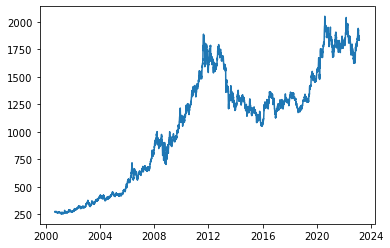

In [4]:
plt.plot(gold.Close)

In [5]:
df = gold.copy()

In [6]:
df = df.reset_index()

In [7]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [9]:
df['month'] = df['Date'].dt.to_period('M')

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,2000-08
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,2000-08
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0,2000-09
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2,2000-09
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0,2000-09


In [11]:
df.month.unique()

<PeriodArray>
['2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02',
 '2001-03', '2001-04', '2001-05',
 ...
 '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11',
 '2022-12', '2023-01', '2023-02']
Length: 271, dtype: period[M]

In [12]:
df['day'] = df['Date'].dt.to_period('D')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month,day
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,2000-08,2000-08-30
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,2000-08,2000-08-31
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0,2000-09,2000-09-01
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2,2000-09,2000-09-05
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0,2000-09,2000-09-06


In [14]:
# keys for your dictionary
list_of_month_yr = list(df.month.unique())

In [15]:
list_of_month_yr = [str(i) for i in list_of_month_yr]

In [16]:
list_of_month_yr[0]

'2000-08'

In [17]:
test_month = '2000-08'

In [18]:
df[df['month'] == test_month]

,Date,Open,High,Low,Close,Adj Close,Volume,month,day
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,2000-08,2000-08-30
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,2000-08,2000-08-31


In [19]:
df[df['month'] == list_of_month_yr[0]]

,Date,Open,High,Low,Close,Adj Close,Volume,month,day
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,2000-08,2000-08-30
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,2000-08,2000-08-31


In [20]:
earliest_day_dict = {}

for key in list_of_month_yr:
    earliest_day_dict[key] = 0

In [21]:
earliest_day_dict['2000-08']

0

In [22]:
min(df[df['month'] == list_of_month_yr[0]].day)

Period('2000-08-30', 'D')

In [23]:
# so combining the above, we will loop through the df by 'year-month' string
# we will then select the min to select the first available date in that month
# that value say the close price will selected as the invested price for that month
# which will go in the calculator

for key,val in earliest_day_dict.items():
    earliest_day_dict[key] = min(df[df['month'] == key].day)

In [24]:
earliest_day_dict['2000-08']

Period('2000-08-30', 'D')

In [25]:
test_month2 = '2000-12'

In [26]:
df[df['month'] == '2001-2']

,Date,Open,High,Low,Close,Adj Close,Volume,month,day
105,2001-02-01,266.299988,268.899994,266.299988,268.500000,268.500000,410,2001-02,2001-02-01
106,2001-02-02,268.000000,268.200012,266.500000,267.100006,267.100006,107,2001-02,2001-02-02
107,2001-02-05,265.100006,265.799988,265.100006,265.200012,265.200012,192,2001-02,2001-02-05
108,2001-02-06,263.899994,263.899994,261.799988,263.299988,263.299988,25,2001-02,2001-02-06
109,2001-02-07,262.799988,263.500000,262.399994,262.799988,262.799988,166,2001-02,2001-02-07
110,2001-02-08,263.500000,263.500000,259.799988,260.100006,260.100006,13,2001-02,2001-02-08
111,2001-02-09,260.500000,260.500000,259.000000,259.899994,259.899994,0,2001-02,2001-02-09
112,2001-02-12,262.500000,262.500000,260.100006,260.700012,260.700012,17,2001-02,2001-02-12
113,2001-02-13,261.000000,261.000000,261.000000,260.299988,260.299988,0,2001-02,2001-02-13
114,2001-02-14,260.000000,260.000000,259.399994,259.399994,259.399994,30,2001-02,2001-02-14


In [27]:
earliest_day_dict['2000-12']

Period('2000-12-01', 'D')

In [28]:
df[df['day'] == earliest_day_dict['2000-12']]['Close'].values[0]

268.70001220703125

In [29]:
# it works!

In [30]:
temp_dates = []

start = '2000-12'
end = '2010-12'

for key in earliest_day_dict.keys():
    if key >= start and key <= end:
        temp_dates.append(key)

In [31]:
temp_dates[0],temp_dates[-1]

('2000-12', '2010-12')

In [32]:
oz_price_store = []

for date in temp_dates:
    oz_price_store.append(df[df['day'] == earliest_day_dict[date]]['Close'].values[0])

In [33]:
oz_price_store[:5]

[268.70001220703125,
 268.3999938964844,
 268.5,
 265.20001220703125,
 255.60000610351562]

In [34]:
len(temp_dates),len(oz_price_store)

(121, 121)

In [35]:
def repeated_investment(x,length):
    investments = list(np.zeros(length))
    investments = [x for i in investments]
    return investments

In [36]:
repeated_investment(250,len(temp_dates))[:5]

[250, 250, 250, 250, 250]

In [37]:
investment_history = repeated_investment(250,len(temp_dates))

In [38]:
num_ozs = []
for idx,price in enumerate(oz_price_store):
    num_ozs.append(investment_history[idx]/price)

In [39]:
# check length

len(num_ozs)

121

In [40]:
num_ozs[:5]

[0.9304056145981004,
 0.9314456247581704,
 0.931098696461825,
 0.9426847228228437,
 0.978090743467167]

In [41]:
# so to get the total value of your investment
# just add up the oz's and mutliply by the end date
sum(num_ozs)*df[df['day'] == earliest_day_dict[end]]['Close'].values[0]

86946.51644980437

In [42]:
# amount invested?
sum(investment_history)

30250

In [43]:
# return in %
(sum(num_ozs)*df[df['day'] == earliest_day_dict[end]]['Close'].values[0]/sum(investment_history)-1)*100

187.42650066051033

In [44]:
# number of years 

int(len(temp_dates)/12)

10

In [45]:
def whatif_calculator(start,end,invest_amount):
    
    '''this calculator works out for a given start month and end month
        and a given monthly investment aount, how much you would have 
        at the end of the period, taking into account all the fluctuations
        at the start of the month'''
    
    temp_dates = []

    for key in earliest_day_dict.keys():
        if key >= start and key <= end:
            temp_dates.append(key)
            
    oz_price_store = []

    for date in temp_dates:
        oz_price_store.append(df[df['day'] == earliest_day_dict[date]]['Close'].values[0])
        
    investment_history = repeated_investment(invest_amount,len(temp_dates))
    
    num_ozs = []
    
    for idx,price in enumerate(oz_price_store):
        num_ozs.append(investment_history[idx]/price)
        
    # so to get the total value of your investment
    # just add up the oz's and mutliply by the end date
    end_value = sum(num_ozs)*df[df['day'] == earliest_day_dict[end]]['Close'].values[0]
    
    # original investment
    original_investment = sum(investment_history)
    
    annual_return = (end_value/original_investment)**(1/int(len(temp_dates)/12))-1
    overall_return = ((end_value/original_investment)-1)*100
    
    print("Original Investment : %2d, Latest Value : %5.2f" % (original_investment, end_value))
    print("Effective annual return: %5.2f, Overall return : %5.2f" % (annual_return*100,overall_return))

In [46]:
whatif_calculator(start,end,300)

Original Investment : 36300, Latest Value : 104335.82
Effective annual return: 11.14, Overall return : 187.43


In [47]:
start = '2002-01'
end = '2022-01'
whatif_calculator(start,end,250)

Original Investment : 60250, Latest Value : 133791.59
Effective annual return:  4.07, Overall return : 122.06


In [ ]:
# anualized return